In [5]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import cross_validate, StratifiedKFold

In [2]:
model = SentenceTransformer('all-MiniLM-L6-v2')

## Milk Froth

In [17]:
csv_files = 'data/ablation_topic_froth.csv'

In [18]:
df = pd.read_csv(csv_files)

In [19]:
# Define the columns for LLM-generated and human-generated
llm_columns = ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched']
human_columns = ['human-1', 'human-2']

In [20]:
new_rows = []
for index, row in df.iterrows():
    for col in llm_columns:
        new_rows.append({'Type': 'LLM-Generated', 'Value': row[col]})
    
    for col in human_columns:
        new_rows.append({'Type': 'human-generated', 'Value': row[col]})
    
new_df = pd.DataFrame(new_rows)

In [21]:
new_df['Type'].value_counts()

LLM-Generated      400
human-generated    100
Name: Type, dtype: int64

In [22]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [23]:
# Encode the 'Value' column text data into embeddings
embeddings = model.encode(new_df['Value'].astype('str').tolist())

In [24]:
embeddings.shape

(500, 384)

In [25]:
# Convert 'Type' into a binary target variable
# LLM-Generated -> 0 & Human-Generated -> 1
new_df['Target'] = new_df['Type'].map({'LLM-Generated': 0, 'human-generated': 1})

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, new_df['Target'], test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        84
           1       1.00      0.81      0.90        16

    accuracy                           0.97       100
   macro avg       0.98      0.91      0.94       100
weighted avg       0.97      0.97      0.97       100



**Classification Metrics**: The performance metrics from the `classification_report` such as accuracy, precision, recall (sensitivity), and F1-score give us a quantitative measure of how well the model is distinguishing between the two classes. High values (close to 1) indicate good separability.

**Confusion Matrix**: This shows the number of true positives, true negatives, false positives, and false negatives. A model that perfectly linearly separates the data will have non-zero values only on the diagonal (true positives and true negatives). Note: [[TP, FP] [FN, TN]]. An additional note, since we define 'human-generated' as the positive class (1), then a false positive means the model incorrectly predicted a piece of text to be 'human-generated' when it was actually 'LLM-generated'. Likewise, since we define 'LLM-generated' as the negative class (0), a false negative means the model incorrectly predicted a piece of text to be 'LLM-generated' when it was actually 'human-generated'.

**ROC Curve and AUC**: The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) illustrates the performance of our binary classifier model. An AUC close to 1 generally indicates near perfect separability.

Confusion Matrix:
 [[84  0]
 [ 3 13]]


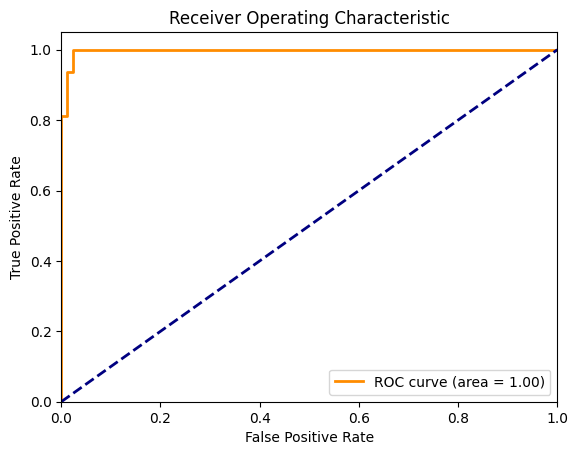

In [30]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Exercise Device

In [31]:
csv_files = 'data/ablation_topic_exercise.csv'

df = pd.read_csv(csv_files)

# Define the columns for LLM-generated and human-generated
llm_columns = ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched']
human_columns = ['human-1', 'human-2']

new_rows = []
for index, row in df.iterrows():
    for col in llm_columns:
        new_rows.append({'Type': 'LLM-Generated', 'Value': row[col]})
    
    for col in human_columns:
        new_rows.append({'Type': 'human-generated', 'Value': row[col]})
    
new_df = pd.DataFrame(new_rows)

In [33]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the 'Value' column text data into embeddings
embeddings = model.encode(new_df['Value'].astype('str').tolist())

# Convert 'Type' into a binary target variable
# LLM-Generated -> 0 & Human-Generated -> 1
new_df['Target'] = new_df['Type'].map({'LLM-Generated': 0, 'human-generated': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, new_df['Target'], test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        80
           1       1.00      0.45      0.62        22

    accuracy                           0.88       102
   macro avg       0.93      0.73      0.78       102
weighted avg       0.90      0.88      0.86       102



Confusion Matrix:
 [[80  0]
 [12 10]]


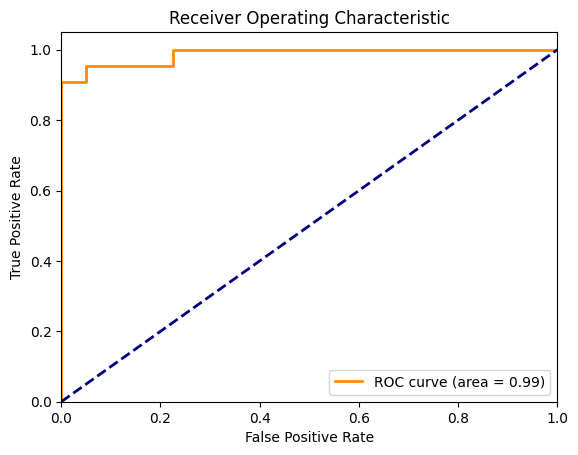

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Powder

In [35]:
csv_files = 'data/ablation_topic_powder.csv'

df = pd.read_csv(csv_files)

# Define the columns for LLM-generated and human-generated
llm_columns = ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched']
human_columns = ['human-1', 'human-2']

new_rows = []
for index, row in df.iterrows():
    for col in llm_columns:
        new_rows.append({'Type': 'LLM-Generated', 'Value': row[col]})
    
    for col in human_columns:
        new_rows.append({'Type': 'human-generated', 'Value': row[col]})
    
new_df = pd.DataFrame(new_rows)

In [36]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the 'Value' column text data into embeddings
embeddings = model.encode(new_df['Value'].astype('str').tolist())

# Convert 'Type' into a binary target variable
# LLM-Generated -> 0 & Human-Generated -> 1
new_df['Target'] = new_df['Type'].map({'LLM-Generated': 0, 'human-generated': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, new_df['Target'], test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        84
           1       1.00      0.38      0.55        16

    accuracy                           0.90       100
   macro avg       0.95      0.69      0.74       100
weighted avg       0.91      0.90      0.88       100



Confusion Matrix:
 [[84  0]
 [10  6]]


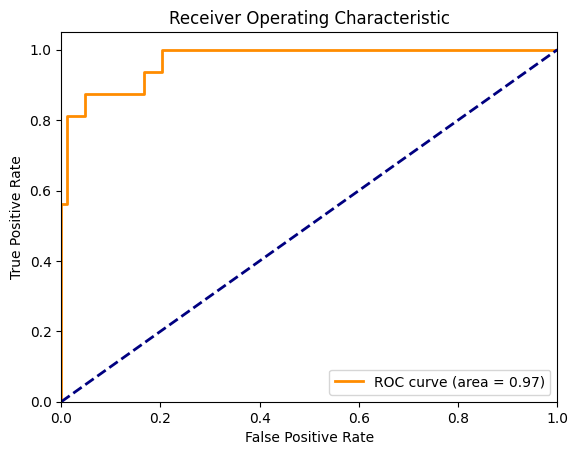

In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Time

In [39]:
csv_files = 'data/ablation_topic_time.csv'

df = pd.read_csv(csv_files)

# Define the columns for LLM-generated and human-generated
llm_columns = ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched']
human_columns = ['human-1', 'human-2']

new_rows = []
for index, row in df.iterrows():
    for col in llm_columns:
        new_rows.append({'Type': 'LLM-Generated', 'Value': row[col]})
    
    for col in human_columns:
        new_rows.append({'Type': 'human-generated', 'Value': row[col]})
    
new_df = pd.DataFrame(new_rows)

In [40]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the 'Value' column text data into embeddings
embeddings = model.encode(new_df['Value'].astype('str').tolist())

# Convert 'Type' into a binary target variable
# LLM-Generated -> 0 & Human-Generated -> 1
new_df['Target'] = new_df['Type'].map({'LLM-Generated': 0, 'human-generated': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, new_df['Target'], test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        84
           1       1.00      0.38      0.55        16

    accuracy                           0.90       100
   macro avg       0.95      0.69      0.74       100
weighted avg       0.91      0.90      0.88       100



Confusion Matrix:
 [[84  0]
 [10  6]]


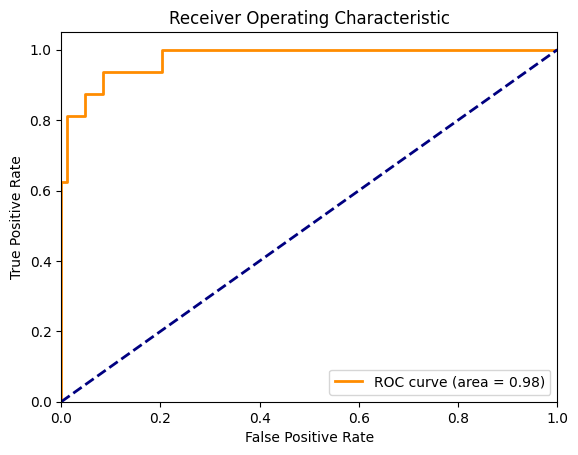

In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Towels

In [42]:
csv_files = 'data/ablation_topic_towels.csv'

df = pd.read_csv(csv_files)

# Define the columns for LLM-generated and human-generated
llm_columns = ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched']
human_columns = ['human-1', 'human-2']

new_rows = []
for index, row in df.iterrows():
    for col in llm_columns:
        new_rows.append({'Type': 'LLM-Generated', 'Value': row[col]})
    
    for col in human_columns:
        new_rows.append({'Type': 'human-generated', 'Value': row[col]})
    
new_df = pd.DataFrame(new_rows)

In [43]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the 'Value' column text data into embeddings
embeddings = model.encode(new_df['Value'].astype('str').tolist())

# Convert 'Type' into a binary target variable
# LLM-Generated -> 0 & Human-Generated -> 1
new_df['Target'] = new_df['Type'].map({'LLM-Generated': 0, 'human-generated': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, new_df['Target'], test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        84
           1       1.00      0.56      0.72        16

    accuracy                           0.93       100
   macro avg       0.96      0.78      0.84       100
weighted avg       0.94      0.93      0.92       100



Confusion Matrix:
 [[84  0]
 [ 7  9]]


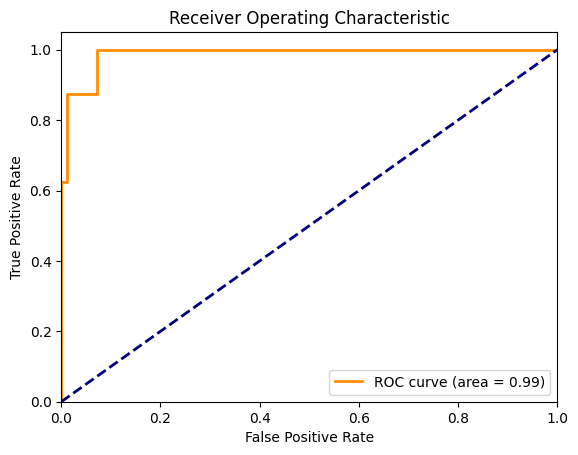

In [44]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Stratified KFold Method!

## Time

In [3]:
csv_files = 'data/ablation_topic_time.csv'

df = pd.read_csv(csv_files)

# Define the columns for LLM-generated and human-generated
llm_columns = ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched']
human_columns = ['human-1', 'human-2']

new_rows = []
for index, row in df.iterrows():
    for col in llm_columns:
        new_rows.append({'Type': 'LLM-Generated', 'Value': row[col]})
    
    for col in human_columns:
        new_rows.append({'Type': 'human-generated', 'Value': row[col]})
    
new_df = pd.DataFrame(new_rows)

In [7]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the 'Value' column text data into embeddings
embeddings = model.encode(new_df['Value'].astype('str').tolist())

# Convert 'Type' into a binary target variable
# LLM-Generated -> 0 & Human-Generated -> 1
new_df['Target'] = new_df['Type'].map({'LLM-Generated': 0, 'human-generated': 1})

# Initialize your logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Define StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics you're interested in
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation
cv_results = cross_validate(lr_model, embeddings, new_df['Target'], cv=stratified_kfold, scoring=scoring, return_train_score=False)

# Print the results for each metric
for score in scoring:
    print("K-Folds Method", f"Mean {score}: ", np.mean(cv_results[f'test_{score}']))

K-Folds Method Mean accuracy:  0.908
K-Folds Method Mean precision:  0.9846153846153847
K-Folds Method Mean recall:  0.55
K-Folds Method Mean f1:  0.7016757436112275


Generally high mean accuracy, precision, recall, and F1 indicates good separability (close to 1)

### Mean Accuracy: 0.908

- This is a high accuracy score, suggesting that, on average, the logistic regression model is able to correctly classify a significant majority of the sentences as either LLM-Generated or Human-Generated. High accuracy is a positive indicator of separability, implying that a linear boundary between the classes exists that the model can exploit.

### Mean Precision: 0.9846153846153847

- Precision is exceptionally high, indicating that when the model predicts a sentence to be in the positive class (which we assume to be "Human-Generated"), it is correct about 98.5% of the time. This suggests that the model is very reliable in its positive predictions, contributing to the evidence of separability. However, high precision with respect to one class doesn't fully describe the model's overall ability to separate both classes.

### Mean Recall: 0.55

- Recall (or sensitivity) is significantly lower than precision, indicating that the model only correctly identifies 55% of the actual Human-Generated sentences. This suggests that while the model is very confident and accurate in the predictions it makes for the Human-Generated class, it misses a substantial portion of this class, likely misclassifying them as LLM-Generated. This could point to a limitation in the linear separability, especially in terms of the model's ability to capture all instances of one class without misclassification.

### Mean F1 Score: 0.7016757436112275

- The F1 score is the harmonic mean of precision and recall, providing a single metric that balances the two. An F1 score of approximately 0.70 suggests that the model has a good but not excellent balance between precision and recall. This is a respectable score but indicates room for improvement, especially in increasing recall without significantly sacrificing precision.

### Interpretation Regarding Separability

- **Evidence of Partial Separability**: The high accuracy and precision suggest that there is a degree of linear separability in your data, allowing the logistic regression model to effectively distinguish between many of the LLM-Generated and Human-Generated sentences.
  
- **Limitations in Recall**: The moderate recall score indicates a limitation in this separability, particularly in consistently identifying all Human-Generated sentences. This could mean that while a linear boundary exists, it may not perfectly separate the classes, especially under the challenge of identifying all positives (Human-Generated sentences) correctly.

- **Overall**: Your results suggest that there is a significant degree of linear separability in your dataset, but it's not absolute. The model is highly reliable in its positive predictions but fails to capture all instances of the Human-Generated class, indicating that the separability, while strong, is not perfect.

## Powder

In [8]:
csv_files = 'data/ablation_topic_powder.csv'

df = pd.read_csv(csv_files)

# Define the columns for LLM-generated and human-generated
llm_columns = ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched']
human_columns = ['human-1', 'human-2']

new_rows = []
for index, row in df.iterrows():
    for col in llm_columns:
        new_rows.append({'Type': 'LLM-Generated', 'Value': row[col]})
    
    for col in human_columns:
        new_rows.append({'Type': 'human-generated', 'Value': row[col]})
    
new_df = pd.DataFrame(new_rows)

In [9]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the 'Value' column text data into embeddings
embeddings = model.encode(new_df['Value'].astype('str').tolist())

# Convert 'Type' into a binary target variable
# LLM-Generated -> 0 & Human-Generated -> 1
new_df['Target'] = new_df['Type'].map({'LLM-Generated': 0, 'human-generated': 1})

# Initialize your logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Define StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics you're interested in
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation
cv_results = cross_validate(lr_model, embeddings, new_df['Target'], cv=stratified_kfold, scoring=scoring, return_train_score=False)

# Print the results for each metric
for score in scoring:
    print("K-Folds Method", f"Mean {score}: ", np.mean(cv_results[f'test_{score}']))

K-Folds Method Mean accuracy:  0.8859999999999999
K-Folds Method Mean precision:  1.0
K-Folds Method Mean recall:  0.43000000000000005
K-Folds Method Mean f1:  0.5916505835860674


## Exercise Device

In [10]:
csv_files = 'data/ablation_topic_exercise.csv'

df = pd.read_csv(csv_files)

# Define the columns for LLM-generated and human-generated
llm_columns = ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched']
human_columns = ['human-1', 'human-2']

new_rows = []
for index, row in df.iterrows():
    for col in llm_columns:
        new_rows.append({'Type': 'LLM-Generated', 'Value': row[col]})
    
    for col in human_columns:
        new_rows.append({'Type': 'human-generated', 'Value': row[col]})
    
new_df = pd.DataFrame(new_rows)

In [11]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the 'Value' column text data into embeddings
embeddings = model.encode(new_df['Value'].astype('str').tolist())

# Convert 'Type' into a binary target variable
# LLM-Generated -> 0 & Human-Generated -> 1
new_df['Target'] = new_df['Type'].map({'LLM-Generated': 0, 'human-generated': 1})

# Initialize your logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Define StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics you're interested in
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation
cv_results = cross_validate(lr_model, embeddings, new_df['Target'], cv=stratified_kfold, scoring=scoring, return_train_score=False)

# Print the results for each metric
for score in scoring:
    print("K-Folds Method", f"Mean {score}: ", np.mean(cv_results[f'test_{score}']))

K-Folds Method Mean accuracy:  0.8745098039215687
K-Folds Method Mean precision:  1.0
K-Folds Method Mean recall:  0.3742857142857143
K-Folds Method Mean f1:  0.5311749680715198


## Milk Froth

In [12]:
csv_files = 'data/ablation_topic_froth.csv'

df = pd.read_csv(csv_files)

# Define the columns for LLM-generated and human-generated
llm_columns = ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched']
human_columns = ['human-1', 'human-2']

new_rows = []
for index, row in df.iterrows():
    for col in llm_columns:
        new_rows.append({'Type': 'LLM-Generated', 'Value': row[col]})
    
    for col in human_columns:
        new_rows.append({'Type': 'human-generated', 'Value': row[col]})
    
new_df = pd.DataFrame(new_rows)

In [13]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the 'Value' column text data into embeddings
embeddings = model.encode(new_df['Value'].astype('str').tolist())

# Convert 'Type' into a binary target variable
# LLM-Generated -> 0 & Human-Generated -> 1
new_df['Target'] = new_df['Type'].map({'LLM-Generated': 0, 'human-generated': 1})

# Initialize your logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Define StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics you're interested in
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation
cv_results = cross_validate(lr_model, embeddings, new_df['Target'], cv=stratified_kfold, scoring=scoring, return_train_score=False)

# Print the results for each metric
for score in scoring:
    print("K-Folds Method", f"Mean {score}: ", np.mean(cv_results[f'test_{score}']))

K-Folds Method Mean accuracy:  0.9400000000000001
K-Folds Method Mean precision:  1.0
K-Folds Method Mean recall:  0.7
K-Folds Method Mean f1:  0.8218614718614718


## Towels

In [14]:
csv_files = 'data/ablation_topic_towels.csv'

df = pd.read_csv(csv_files)

# Define the columns for LLM-generated and human-generated
llm_columns = ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched']
human_columns = ['human-1', 'human-2']

new_rows = []
for index, row in df.iterrows():
    for col in llm_columns:
        new_rows.append({'Type': 'LLM-Generated', 'Value': row[col]})
    
    for col in human_columns:
        new_rows.append({'Type': 'human-generated', 'Value': row[col]})
    
new_df = pd.DataFrame(new_rows)

In [15]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the 'Value' column text data into embeddings
embeddings = model.encode(new_df['Value'].astype('str').tolist())

# Convert 'Type' into a binary target variable
# LLM-Generated -> 0 & Human-Generated -> 1
new_df['Target'] = new_df['Type'].map({'LLM-Generated': 0, 'human-generated': 1})

# Initialize your logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Define StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics you're interested in
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation
cv_results = cross_validate(lr_model, embeddings, new_df['Target'], cv=stratified_kfold, scoring=scoring, return_train_score=False)

# Print the results for each metric
for score in scoring:
    print("K-Folds Method", f"Mean {score}: ", np.mean(cv_results[f'test_{score}']))

K-Folds Method Mean accuracy:  0.898
K-Folds Method Mean precision:  1.0
K-Folds Method Mean recall:  0.49000000000000005
K-Folds Method Mean f1:  0.6481593119524154
